# Building a Spotify Recommendation Engine for Music Labels
## Data Collection, Cleaning, and EDA
### Flatiron School Data Science Program Phase 4 Project<br>Justin Williams & Khyatee Desai

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import os
import requests
from bs4 import BeautifulSoup
from zipfile import ZipFile 
from sklearn import set_config
set_config(print_changed_only=False, display=None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# set directory
PROJECT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)

# function for saving figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Data Collection with Webscraping

Utilize BeautifulSoup to scrape artist roster data directly from music record labels websites. This will eventually be merged with the Spotify dataset.

## Sub Pop Records Artists

In [4]:
# retrieve html page and create beautifulsoup object

page = requests.get('https://www.subpop.com/artists/list')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
subpop = []
artists = soup.find(id="all-artists")
for name in artists.findAll('a')[:-1]:
    subpop.append(name.text)

In [5]:
# add subpop artists to Labels dataframe

label_list = ['Sub Pop']*len(subpop)
to_df = zip(subpop, label_list)
subpop_df = pd.DataFrame(to_df)
subpop_df.head()

,0,1
0,10 Minute Warning,Sub Pop
1,5ive Style,Sub Pop
2,68 Comeback,Sub Pop
3,764-HERO,Sub Pop
4,A Frames,Sub Pop


## 4AD Artists

In [6]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://4ad.com/artists')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
AD4 = []
artists = soup.find(id="artistlistingmain")
for name in artists.findAll('a',href=True):
    AD4.append(name.text)

In [7]:
# add 4AD artists to Labels dataframe

label_list = ['4AD']*len(AD4)
to_df = zip(AD4, label_list)
fourad_df = pd.DataFrame(to_df)
fourad_df.head()

,0,1
0,50 Foot Wave,4AD
1,A.R. Kane,4AD
2,Adrianne Lenker,4AD
3,Air Miami,4AD
4,Aldous Harding,4AD


## Fat Possum Records

In [8]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://fatpossum.com/featured-artists/all-artists/')
soup = BeautifulSoup(page.text)
soup.prettify

# # parse through soup and save artist names in a list
possum = []
artists = soup.find(id="all-artists")
for name in artists.findAll('a',href=True, title=True):
    possum.append(name.text)

In [9]:
# add fat possum artists to dataframe

label_list = ['Fat Possum']*len(possum)
to_df = zip(possum, label_list)
possum_df = pd.DataFrame(to_df)
possum_df.head()

,0,1
0,2:54,Fat Possum
1,A. A. Bondy,Fat Possum
2,Adam Green,Fat Possum
3,Adam Torres,Fat Possum
4,Al Green,Fat Possum


## Matador Records

In [10]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://www.matadorrecords.com/artists')
soup = BeautifulSoup(page.text)
soup.prettify

matador = []
artists = soup.find(class_="artists-page")
for name in artists.findAll('a',href=True):
    if name.text:
        matador.append(name.text) 

# get alumni artists
alumns = soup.find(class_="col-section")
for name in alumns.findAll('a',href=True)[1:]:
    matador.append(name.text)

In [11]:
# add Matador artists to dataframe

label_list = ['Matador']*len(matador)
to_df = zip(matador, label_list)
matador_df = pd.DataFrame(to_df)
matador_df.head()

,0,1
0,Algiers,Matador
1,Belle and Sebastian,Matador
2,Body/Head,Matador
3,Car Seat Headrest,Matador
4,Courtney Barnett & Kurt Vile,Matador


## Third Man Records - taking this out to see how it effects recs

This was removed because it was a very large dataset and was dominating the recommender system results.

In [12]:
# # retrieve html page and create beautifulsoup object
# page = requests.get('https://thirdmanstore.com/bands')
# soup = BeautifulSoup(page.text)
# soup.prettify

# # parse through soup and save artist names in a list
# thirdman = []
# artists = soup.find(class_="category-view")
# for name in artists.findAll('a',href=True):
#     thirdman.append(name.text)

In [13]:
# # add third man artists to dataframe

# label_list = ['Third Man']*len(thirdman)
# to_df = zip(thirdman, label_list)
# thirdman_df = pd.DataFrame(to_df)
# thirdman_df.head()

## XL Records

In [14]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://xlrecordings.com/buy')
soup = BeautifulSoup(page.text)
soup.prettify


# parse through soup and save artist names in a list
XL = []
artists = soup.find(class_="artists")
for name in artists.findAll('a',href=True):
    XL.append(name.text)

In [15]:
# add XL records artists to dataframe

label_list = ['XL']*len(XL)
to_df = zip(XL, label_list)
XL_df = pd.DataFrame(to_df)
XL_df.head()

,0,1
0,Adele,XL
1,Arca,XL
2,Archy Marshall,XL
3,Atoms For Peace,XL
4,Baba Stiltz,XL


## Dead Oceans

In [16]:
# retrieve html page and create beautifulsoup object (dead oceans website blocks requests, so using Wikipedia)
page = requests.get('https://en.wikipedia.org/wiki/Dead_Oceans#Artists')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
deadoceans = []
artists = soup.find(class_="div-col columns column-width")
for name in artists.findAll('a',href=True):
    deadoceans.append(name.text)

In [17]:
# add dead oceans artists to dataframe

label_list = ['Dead Oceans']*len(deadoceans)
to_df = zip(deadoceans, label_list)
deadoceans_df = pd.DataFrame(to_df)
deadoceans_df.head()

,0,1
0,A Place to Bury Strangers,Dead Oceans
1,Akron/Family,Dead Oceans
2,Julianna Barwick,Dead Oceans
3,Bear in Heaven,Dead Oceans
4,Better Oblivion Community Center,Dead Oceans


## Touch and Go

In [18]:
# retrieve html page and create beautiful soup object
html_page = requests.get('http://www.tgrec.com/bands/index.php')
soup = BeautifulSoup(html_page.text)

In [19]:
# parse through soup and save artist names in a list
touch_and_go = []
artists = soup.find(id="bandsContent")
for name in artists.find_all('li')[:-3]:
    touch_and_go.append(name.text)

In [20]:
# add Touch and Go artists to dataframe

label_list = ['Touch and Go']*len(touch_and_go)
to_df = zip(touch_and_go, label_list)
touchngo_df = pd.DataFrame(to_df)
touchngo_df.head()

,0,1
0,!!!,Touch and Go
1,All the Saints,Touch and Go
2,Angry Red Planet,Touch and Go
3,Arcwelder,Touch and Go
4,Arsenal,Touch and Go


## Temporary Residence

In [21]:
# retrive html page and create beautiful soup object
html_page = requests.get("https://www.temporaryresidence.com/collections")
soup = BeautifulSoup(html_page.text)

In [22]:
# get current artists
temporary_residence = []
artists = soup.find(class_="grid-uniform")
for name in artists.findAll('p'):
    temporary_residence.append(name.text)

# get alumni artists 
alumns = soup.find_all('div', {"class":"grid-uniform"})[1]
for name in alumns.findAll('p'):
    temporary_residence.append(name.text)

In [23]:
# add Temporary Residence artists to dataframe

label_list = ['Temporary Residence']*len(temporary_residence)
to_df = zip(temporary_residence, label_list)
temp_residence_df = pd.DataFrame(to_df)
temp_residence_df.head()

,0,1
0,William Basinski,Temporary Residence
1,William Basinski + Lawrence English,Temporary Residence
2,Bruno Bavota,Temporary Residence
3,Beak>,Temporary Residence
4,Behind the Shadow Drops,Temporary Residence


## Interscope Records

In [24]:
# retrive html page and create beautiful soup object
html_page = requests.get("https://en.wikipedia.org/wiki/List_of_current_Interscope_Records_artists")
soup = BeautifulSoup(html_page.text)

# parse through soup and save current artist names in a list
interscope =[]
section = soup.find(class_="mw-parser-output")
for item in section.findAll('ul')[1:-1]:
    for x in item.findAll('a', title=True):
        interscope.append(x.text)
        

In [25]:
# former artists

# html_page = requests.get("https://en.wikipedia.org/wiki/List_of_former_Interscope_Records_artists")
# soup = BeautifulSoup(html_page.text)

# # parse through soup and save current artist names in a list
# section = soup.find(class_="mw-parser-output")
# for item in section.findAll('ul')[1:-1]:
#     for x in item.findAll('a', title=True):
#         interscope.append(x.text)
        

In [26]:
# add list to dataframe
label_list = ['Interscope']*len(interscope)
to_df = zip(interscope, label_list)
interscope_df = pd.DataFrame(to_df)
interscope_df.head()

,0,1
0,The 1975,Interscope
1,3 Doors Down,Interscope
2,5 Seconds of Summer,Interscope
3,Mad Love,Interscope
4,6lack,Interscope


## Island Records

In [27]:
# retrive html page and create beautiful soup object
html_page = requests.get("https://en.wikipedia.org/wiki/List_of_current_Island_Records_artists")
soup = BeautifulSoup(html_page.text)

# parse through soup and save current artist names in a list
island =[]
section = soup.find(class_="mw-parser-output")
for item in section.findAll('ul')[1:-1]:
    for x in item.findAll('a', title=True):
        island.append(x.text)


In [28]:
# former artists

# html_page = requests.get("https://en.wikipedia.org/wiki/List_of_former_Island_Records_artists")
# soup = BeautifulSoup(html_page.text)

# # parse through soup and save current artist names in a list
# section = soup.find(class_="mw-parser-output")
# for item in section.findAll('ul')[1:-1]:
#     for x in item.findAll('a', title=True):
#         island.append(x.text)

In [29]:
# add list to dataframe
label_list = ['Island']*len(interscope)
to_df = zip(island, label_list)
island_df = pd.DataFrame(to_df)
island_df.head()

,0,1
0,Baby Rose,Island
1,Bag Raiders,Island
2,Baker Boy,Island
3,Banners,Island
4,Buju Banton,Island


## Transgressive Records

In [30]:
# retrive html page and create beautiful soup object
html_page = requests.get("https://en.wikipedia.org/wiki/Transgressive_Records")
soup = BeautifulSoup(html_page.text)

# parse through soup and save current artist names in a list
transgressive =[]
table = soup.find('table',class_="multicol")
td = table.find('td')
links = td.findAll('a')
for l in links[1:-18]:
    transgressive.append(l.text)



In [31]:
# add list to dataframe
label_list = ['Transgressive']*len(transgressive)
to_df = zip(transgressive, label_list)
transgressive_df = pd.DataFrame(to_df)
transgressive_df.head()

,0,1
0,Africa Express,Transgressive
1,Alvvays,Transgressive
2,The Antlers,Transgressive
3,Arlo Parks,Transgressive
4,At The Drive In,Transgressive


## Atlantic Records

In [32]:
# retrive html page and create beautiful soup object
html_page = requests.get("https://en.wikipedia.org/wiki/List_of_current_Atlantic_Records_artists")
soup = BeautifulSoup(html_page.text)

# parse through soup and save current artist names in a list
atlantic =[]
section = soup.find(class_="mw-parser-output")
for item in section.findAll('ul')[:-5]:
    for x in item.findAll('a', title=True):
        atlantic.append(x.text)


In [33]:
# add list to dataframe
label_list = ['Atlantic']*len(atlantic)
to_df = zip(atlantic, label_list)
atlantic_df = pd.DataFrame(to_df)
atlantic_df.head()

,0,1
0,22Gz,Atlantic
1,A Boogie wit da Hoodie,Atlantic
2,Adia Victoria,Atlantic
3,Against The Current,Atlantic
4,Alec Benjamin,Atlantic


### Concatenate all music label dataframes together

In [34]:
music_labels = pd.concat([subpop_df,fourad_df, possum_df, matador_df, XL_df, deadoceans_df, touchngo_df, temp_residence_df, interscope_df, island_df, transgressive_df,atlantic_df], axis=0)
music_labels.rename(columns={0:'artist', 1:'label'}, inplace=True)
music_labels.sample(10)

,artist,label
82,Creep,Sub Pop
331,Omni,Sub Pop
61,Mansionz,Island
39,Guns N' Roses,Interscope
107,Dickless,Sub Pop
206,Sonic Youth / Beck,Matador
155,Mr. Len featuring Mr. Live and Q-Unique,Matador
9,Amazing Crowns,Sub Pop
82,Rumah Sakit,Temporary Residence
394,Sandy Duncan\,Sub Pop


# Data Cleaning

Clean and prep data for analysis.

In [35]:
# extract Spotify dataset from zipped folder
with ZipFile("data/datasets.zip") as z:
    main_df = pd.read_csv(z.open(z.infolist()[0].filename))

In [36]:
# look at dtypes and null
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
acousticness        169909 non-null float64
artists             169909 non-null object
danceability        169909 non-null float64
duration_ms         169909 non-null int64
energy              169909 non-null float64
explicit            169909 non-null int64
id                  169909 non-null object
instrumentalness    169909 non-null float64
key                 169909 non-null int64
liveness            169909 non-null float64
loudness            169909 non-null float64
mode                169909 non-null int64
name                169909 non-null object
popularity          169909 non-null int64
release_date        169909 non-null object
speechiness         169909 non-null float64
tempo               169909 non-null float64
valence             169909 non-null float64
year                169909 non-null int64
dtypes: float64(9), int64(6), object(4)
memory usage: 24.6+ MB


In [37]:
# get some descriptive statistics
main_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


### Change to datetime and create decade

In [38]:
# set release date as datetime
main_df['release_date'] = pd.to_datetime(main_df['release_date'])

In [39]:
# make year column datetime
main_df['year'] = main_df['release_date'].dt.year

In [40]:
# create decade column
main_df['decade'] = main_df['year'].apply(lambda x: str(x)[:3]+'0s')

### Map Keys/Mode

In [41]:
# change keys/mode to letter/maj/min representations
keys = {0:'C', 1:'Db',2:'D',3:'Eb',4:'E',5:'F',6:'F#',7:'G',8:'Ab',9:'A',10:'Bb',11:'B'}
modes = {0:'Minor',1:'Major'}

# create new column in df
main_df['letter_keys'] = main_df['key'].map(keys)
main_df['modes'] = main_df['mode'].map(modes)

round(main_df['letter_keys'].value_counts(normalize=True)*100, 2)

C     12.65
G     12.22
D     11.08
A     10.37
F      9.61
E      7.60
Db     7.54
Bb     7.10
Ab     6.30
B      6.23
F#     5.05
Eb     4.23
Name: letter_keys, dtype: float64

In [42]:
# create a column that concatonates key with mode
main_df['key_mode'] = main_df['letter_keys'] + " " + main_df['modes']

### Impute Outliers

Saving figure speechiness_boxplot


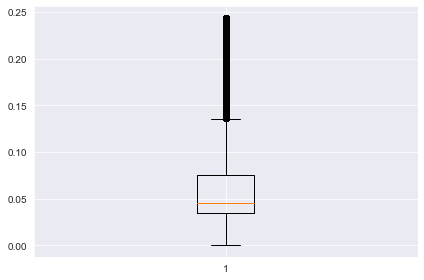

In [43]:
# Bring outliers down/up to 5 standard deviations from the mean
feats = main_df.drop(['id', 'artists','popularity','key', 'mode', 'name', 'release_date', 'year', 
                      'decade','letter_keys', 'modes', 'key_mode'],axis=1).columns
for feat in feats:
    try:
        abv_5_std = main_df[feat].mean()+ 5* main_df[feat].std()
        below_5_std = main_df[feat].mean()- 5* main_df[feat].std()
        conditions = [main_df[feat]>abv_5_std, main_df[feat]<below_5_std]
        choices = [abv_5_std, below_5_std]
        df[feat] = np.select(conditions, choices, main_df[feat])
    except:
        pass

# address speechiness separately, because it has a ton of upper outliers
abv_1_std = main_df['speechiness'].mean()+ 1* main_df['speechiness'].std()
main_df['speechiness'][main_df['speechiness']>abv_1_std] = abv_1_std
plt.boxplot(main_df['speechiness'])
save_fig('speechiness_boxplot');

### Standardize

In [44]:
# Scale features down to 0-1
main_df['scaled_speech'] = (main_df['speechiness'] - min(main_df['speechiness'])) / (max(main_df['speechiness']) - min(main_df['speechiness']))
main_df['scaled_duration'] = (main_df['duration_ms'] - min(main_df['duration_ms'])) / (max(main_df['duration_ms']) - min(main_df['duration_ms']))
main_df['scaled_loudness'] = (main_df['loudness'] - min(main_df['loudness'])) / (max(main_df['loudness']) - min(main_df['loudness']))
main_df['scaled_tempo'] = (main_df['tempo'] - min(main_df['tempo'])) / (max(main_df['tempo']) - min(main_df['tempo']))
main_df['scaled_pop'] = (main_df['popularity'] - min(main_df['popularity'])) / (max(main_df['popularity']) - min(main_df['popularity']))
main_df.sample(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade,letter_keys,modes,key_mode,scaled_speech,scaled_duration,scaled_loudness,scaled_tempo,scaled_pop
62096,0.1150,['Eric Church'],0.589,279080,0.683,0,4NtX8ilJ55woqHXNuc4c5N,0.00477,0,0.2990,-6.719,1,Carolina,41,2009-03-24,0.0253,92.019,0.452,2009,2000s,C,Major,C Major,0.103691,0.050751,0.834406,0.376986,0.41
73388,0.0312,['The J. Geils Band'],0.641,359173,0.854,0,3jP1fsHRuPScfRERZxbD92,0.00008,10,0.1150,-9.646,1,Detroit Breakdown,19,1974-01-01,0.0409,136.058,0.881,1974,1970s,Bb,Major,Bb Major,0.167626,0.065587,0.788568,0.557407,0.19
29712,0.5220,['Wilco'],0.312,214227,0.604,0,5APYN4HtwJPZbjlm7JfBMX,0.00000,0,0.0831,-8.608,1,Passenger Side,37,1995-03-28,0.0296,183.349,0.392,1995,1990s,C,Major,C Major,0.121314,0.038737,0.804823,0.751150,0.37


### Create Dummies

In [45]:
key_dummies = pd.get_dummies(main_df['key_mode'], drop_first=True)
decade_dummies = pd.get_dummies(main_df['decade'], drop_first=True)
main_df = pd.concat([main_df, key_dummies, decade_dummies], axis=1)

### Merge Labels dataframe with Spotify dataframe

In [46]:
# unpack lists in the Artists column, retain the first artist of the list
main_df['artists'] = main_df['artists'].str.slice(1,-1).str.split(',')
main_df['artists'] = main_df['artists'].map(lambda x: x[0])
main_df['artists'] = main_df['artists'].str.slice(1,-1)

In [47]:
# merge dataframes
df = main_df.merge(music_labels, left_on='artists', right_on='artist').drop('artists', axis=1)
df

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade,letter_keys,modes,key_mode,scaled_speech,scaled_duration,scaled_loudness,scaled_tempo,scaled_pop,A Minor,Ab Major,Ab Minor,B Major,B Minor,Bb Major,Bb Minor,C Major,C Minor,D Major,D Minor,Db Major,Db Minor,E Major,E Minor,Eb Major,Eb Minor,F Major,F Minor,F# Major,F# Minor,G Major,G Minor,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2020s,artist,label
0,0.9430,0.605,188093,0.018,0,2LhGDIwDaIw6auSyLtlWuY,0.243000,6,0.0938,-22.202,1,Come On And See About Me,17,1960-01-01,0.0792,119.454,0.142,1960,1960s,F#,Major,F# Major,0.324597,0.033896,0.591935,0.489383,0.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
1,0.7500,0.659,222093,0.236,0,1UdNQ15Q54vCtmo02TLWfq,0.000022,0,0.0700,-15.960,1,The Journey,13,1961-01-01,0.0424,99.012,0.853,1961,1960s,C,Major,C Major,0.173774,0.040194,0.689688,0.405636,0.13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
2,0.6380,0.456,150269,0.296,0,6EdBagK4kqITdw34mBzTof,0.034300,10,0.1080,-12.578,1,A New Leaf,18,1962-01-01,0.0387,174.549,0.427,1962,1960s,Bb,Major,Bb Major,0.158610,0.026890,0.742651,0.715098,0.18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
3,0.5890,0.459,164075,0.167,0,030z99G9TFWAE5Wq0Q6tcg,0.001870,5,0.1040,-14.102,1,I Got A Letter (This Morning),18,1962-01-01,0.0401,181.953,0.196,1962,1960s,F,Major,F Major,0.164348,0.029447,0.718785,0.745431,0.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
4,0.5270,0.682,167336,0.424,0,6S75o3nKlPCfpdAFx0Rseo,0.000000,5,0.1290,-13.623,1,Drug Store Woman,18,1962-01-01,0.0464,70.466,0.688,1962,1960s,F,Major,F Major,0.190168,0.030051,0.726286,0.288687,0.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9488,0.0743,0.669,150600,0.952,0,22zOTz6PaXcvCUqFz6yFC6,0.000016,8,0.0705,-4.339,1,Help You Ann,35,1984-01-01,0.0348,149.518,0.979,1984,1980s,Ab,Major,Ab Major,0.142626,0.026951,0.871678,0.612550,0.35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Lyres,Matador
9489,0.0637,0.364,133133,0.944,0,34lXzclvRDF7O8Xx0jAnFe,0.035000,11,0.1370,-4.038,0,I Just Might Crack,38,1993-01-01,0.0980,162.784,0.902,1993,1990s,B,Minor,B Minor,0.401648,0.023715,0.876392,0.666899,0.38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,The Makers,Sub Pop
9490,0.0381,0.580,400747,0.454,0,2ArusOBCO5xbJV6QlreriJ,0.714000,7,0.1080,-10.877,1,23 Minutes in Brussels,42,1995-07-18,0.0285,93.906,0.612,1995,1990s,G,Major,G Major,0.116806,0.073288,0.769290,0.384717,0.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,Luna,Sub Pop
9491,0.0653,0.316,332307,0.757,0,6tk0VDkOrEZVVjbs0ihFCQ,0.861000,9,0.1830,-5.070,0,Lower the Heavens,46,2006-04-11,0.0313,131.444,0.113,2006,2000s,A,Minor,A Minor,0.128281,0.060610,0.860230,0.538504,0.46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,The Donkeys,Dead Oceans


In [48]:
df['label'].value_counts()

Atlantic               2332
Interscope             1900
Island                 1800
Sub Pop                 964
Fat Possum              615
Matador                 486
4AD                     473
XL                      446
Transgressive           286
Dead Oceans              81
Touch and Go             62
Temporary Residence      48
Name: label, dtype: int64

# Exploratory Data Analysis
### Distribution of songs by year

Saving figure song_decade_hist


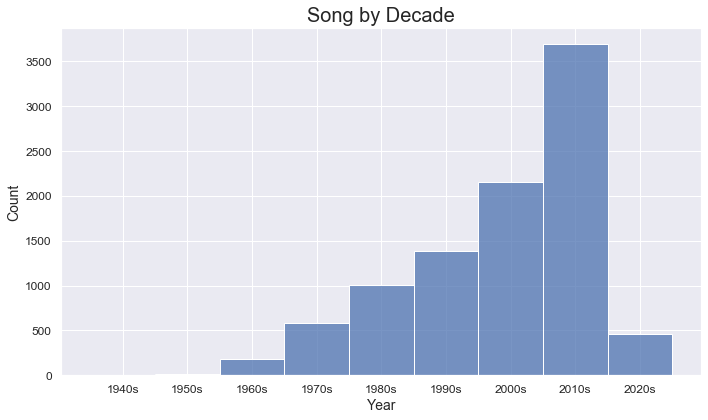

In [49]:
# distribution of songs by decade
sns.set_theme(context='notebook')
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df['decade'].sort_values(), bins='auto')
plt.xlabel('Year', fontdict={'fontsize':14});
plt.ylabel('Count', fontdict={'fontsize':14});
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.title('Song by Decade', fontdict={'fontsize':20})
save_fig('song_decade_hist');

The distribution of most of this group of labels songs, are from the 2000's and 2010's. This tells us the bulk of data is from labels that released substantial material within the past two decades. This is important information when consdiring the scope of the project. 

### Distribution of songs by year, by Record Label

Saving figure label_year_song_hist


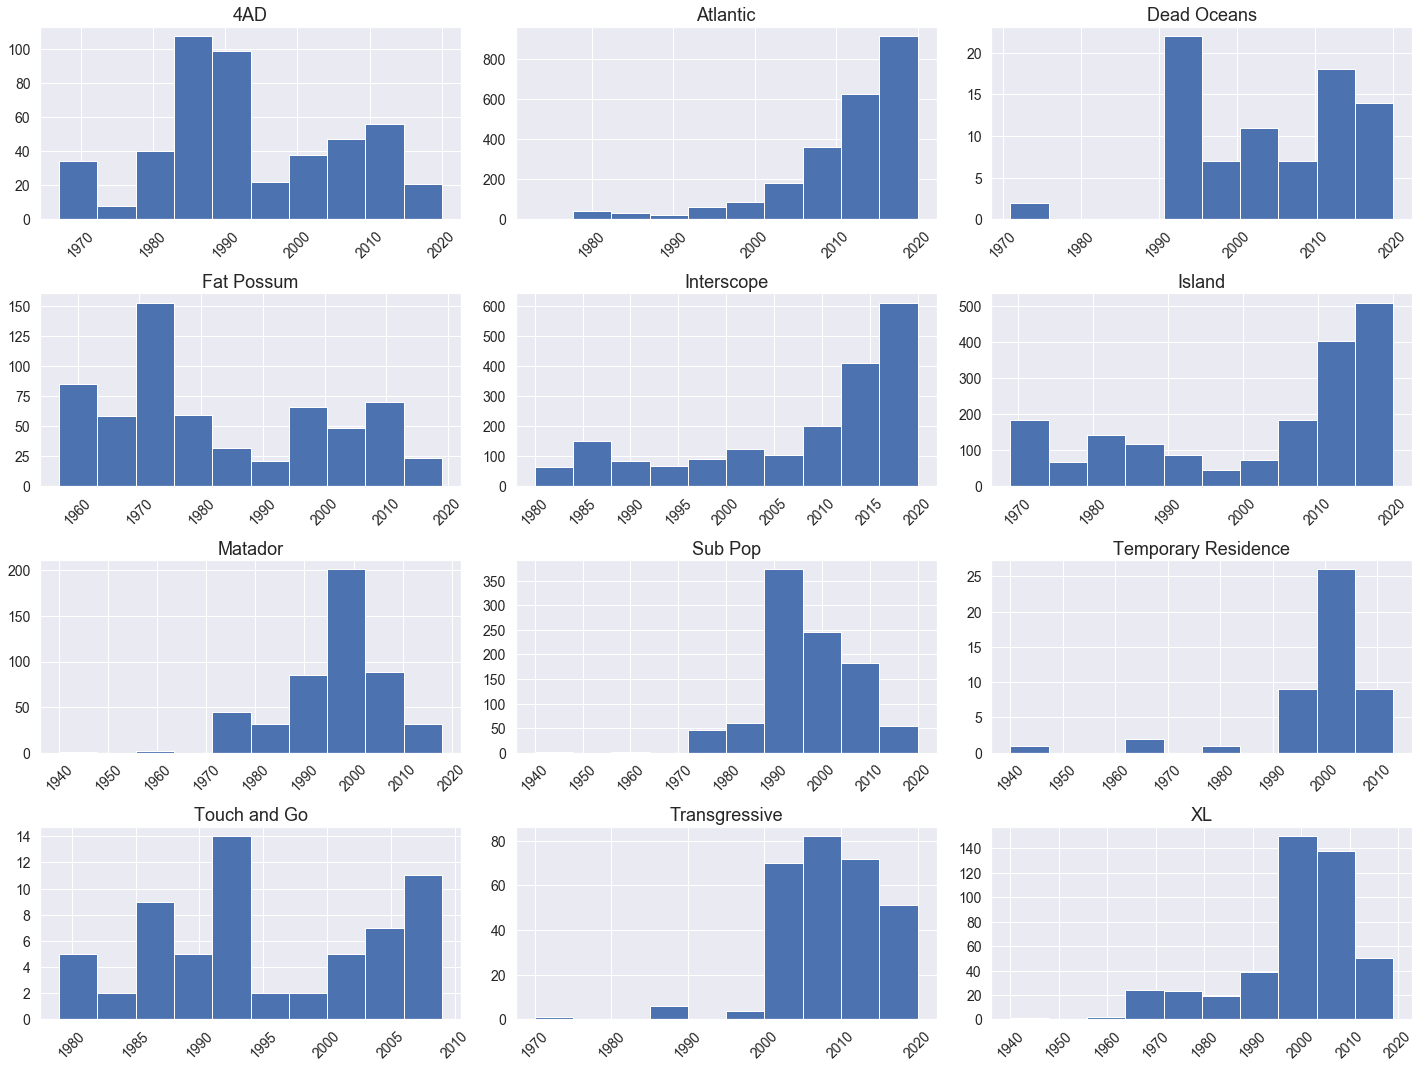

In [50]:
# look at distribution by year for by label
fig = df['year'].hist(by=df['label'],
                xrot=45,
                xlabelsize=14,
                ylabelsize=14,
                figsize=(20,15));
[x.title.set_size(18) for x in fig.ravel()]
save_fig('label_year_song_hist');


This histogram shows the yearly distribution of songs specific to each record label. Having knowledge of when each specific label released material informs us about that time period when they were most active and allows us to compare and contrast labels and time periods. 

### Look at distribution of scaled features

In [81]:
song_features = ['acousticness', 'danceability', 'energy','instrumentalness','liveness', 
                 'valence','scaled_speech','scaled_duration', 'scaled_loudness', 'scaled_tempo', 'scaled_pop']
song_feat_df = df[song_features]

Saving figure scaled_song_feats_boxplot


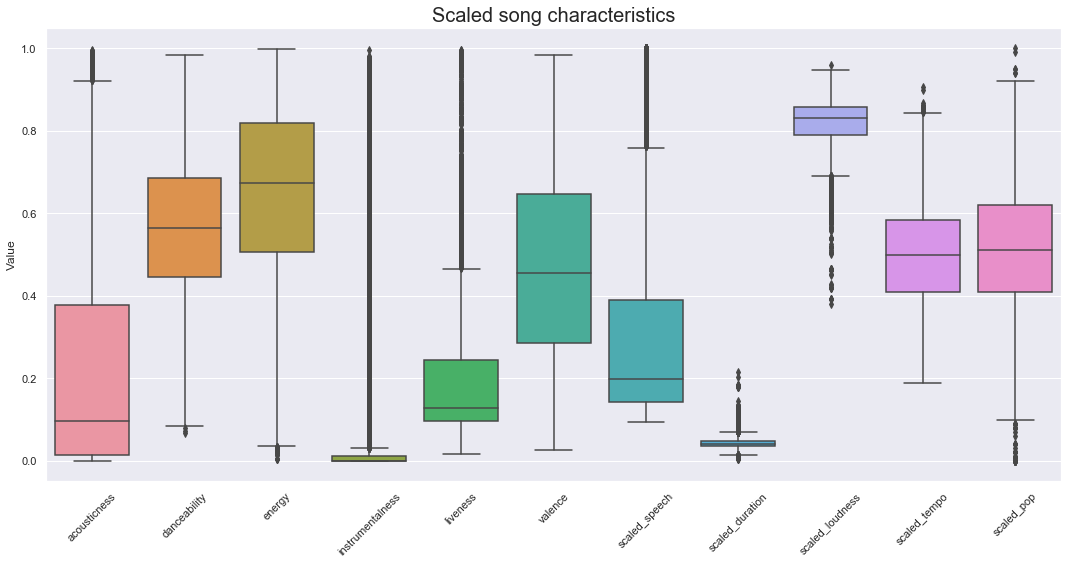

In [91]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=song_feat_df)
plt.title('Scaled song characteristics', fontdict={'fontsize':20})
plt.ylabel('Value', fontdict={'fontsize':12})
plt.xticks(rotation=45)
save_fig('scaled_song_feats_boxplot');

The boxplot of scaled song attributes tells us some attributes are more balanced throughout the dataset then others. For instance `valence` and `popularity` have similar medians and range. Contrastingly song characteristics like `liveness` and `instrumentalness` have lower median scores and a large amount of higher outliers. 

## Song Attributes Compared with Popularity

Saving figure tempo_pop_scatter


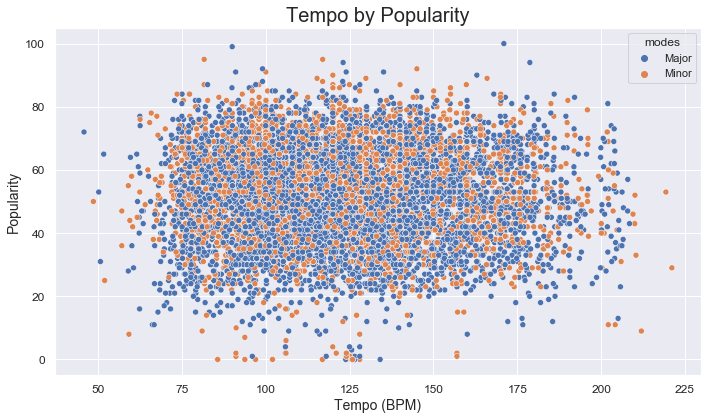

In [80]:
# tempo by popularity
plt.figure(figsize=(10,6))
sns.scatterplot(y='popularity', x='tempo', hue='modes', data=df)
plt.xlabel("Tempo (BPM)", fontdict={'fontsize':14});
plt.ylabel("Popularity", fontdict={'fontsize':14});
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.title('Tempo by Popularity', fontdict={'fontsize':20})
save_fig('tempo_pop_scatter');

The scatterplot tells us tempo and popularity have no linear relationship.

In [180]:
# get total count of major or minor mode
df['modes'].value_counts()

Major    5305
Minor    2854
Name: modes, dtype: int64

Saving figure mode_pop_hist


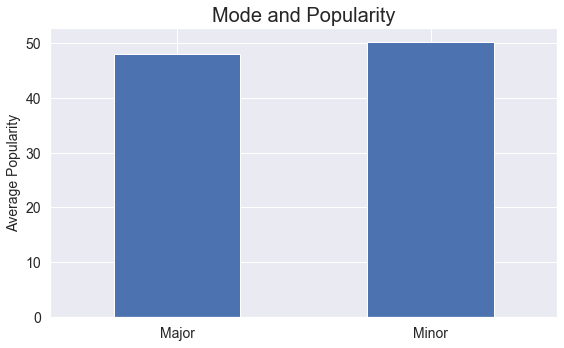

In [181]:
# whats more popular, major or minor key songs
df.groupby('modes')['popularity'].mean().plot(kind='bar',
                                             figsize=(8,5),
                                              fontsize=14,
                                             rot='horizontal')
plt.title("Mode and Popularity", fontdict={'fontsize':20})
plt.ylabel('Average Popularity', fontdict={'fontsize':14})
plt.xlabel('')
save_fig('mode_pop_hist');

Even though there is an imblance between `Major` and `Minor` mode counts, `Minor` modal songs on average are slightly more popular then `Major` songs. This indicates that `popularity` leans more toward the `Minor` side. 

Saving figure key_pop_bar


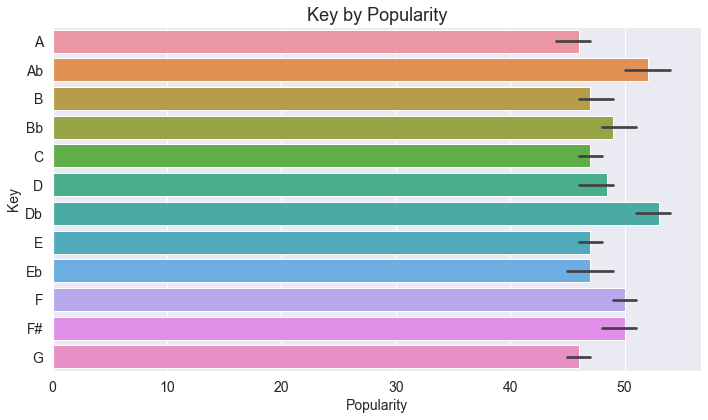

In [263]:
# look at key by popularity
plt.figure(figsize=(10,6))
sns.barplot(y=df['letter_keys'].sort_values(), x=df['popularity'], estimator=np.median, orient='h')
plt.xlabel("Popularity", fontdict={'fontsize':14});
plt.ylabel("Key", fontdict={'fontsize':14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.title("Key by Popularity", fontdict={'fontsize':18});
save_fig('key_pop_bar');

Saving figure key_mode_pop_bar


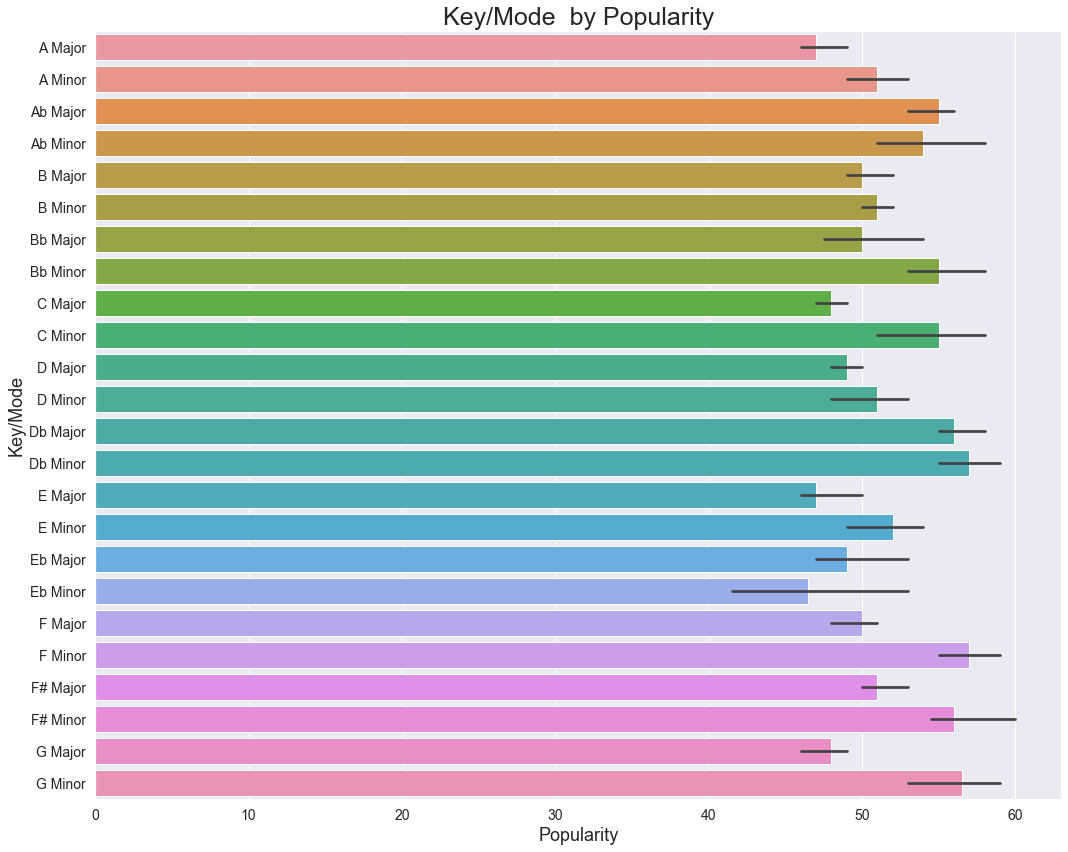

In [90]:
plt.figure(figsize=(15,12))
sns.barplot(y=df['key_mode'].sort_values(), x=df['popularity'], estimator=np.median, orient='h')
plt.xlabel("Popularity", fontdict={'fontsize':18})
plt.ylabel("Key/Mode", fontdict={'fontsize':18})
plt.title("Key/Mode  by Popularity", fontdict={'fontsize':25})
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
save_fig('key_mode_pop_bar');

The above bar charts used median to aggreate key and modes by popularity. In both visuals Db (or C#) was the most popular key, with the `Minor` mode being more popular. F Minor was comparable to Db Minor in the key/mode visual. 

## Record label summary by attribute

In [187]:
song_char = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

label_sum_df = df.groupby('label')['acousticness', 'danceability', 'energy', 'instrumentalness',\
                                   'liveness', 'speechiness', 'valence'].mean()

label_sum_df

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
label,,,,,,,
4AD,0.279961,0.472418,0.562399,0.247659,0.177847,0.045545,0.445027
Dead Oceans,0.328258,0.439210,0.513146,0.326451,0.165757,0.047480,0.402330
Def Jam,0.190306,0.667819,0.672097,0.025793,0.214571,0.131779,0.557179
Fat Possum,0.420300,0.551361,0.505139,0.075654,0.192469,0.061131,0.575210
Interscope,0.176256,0.608389,0.685192,0.043184,0.224166,0.106326,0.463125
Island,0.224472,0.564703,0.648196,0.040134,0.209034,0.078316,0.459207
Matador,0.255059,0.470882,0.671690,0.256433,0.207948,0.059012,0.471008
Sub Pop,0.191383,0.467457,0.686697,0.190806,0.196339,0.055233,0.468853
Temporary Residence,0.471849,0.423383,0.403742,0.531453,0.155975,0.054896,0.319010


Saving figure label_song_attr_barh


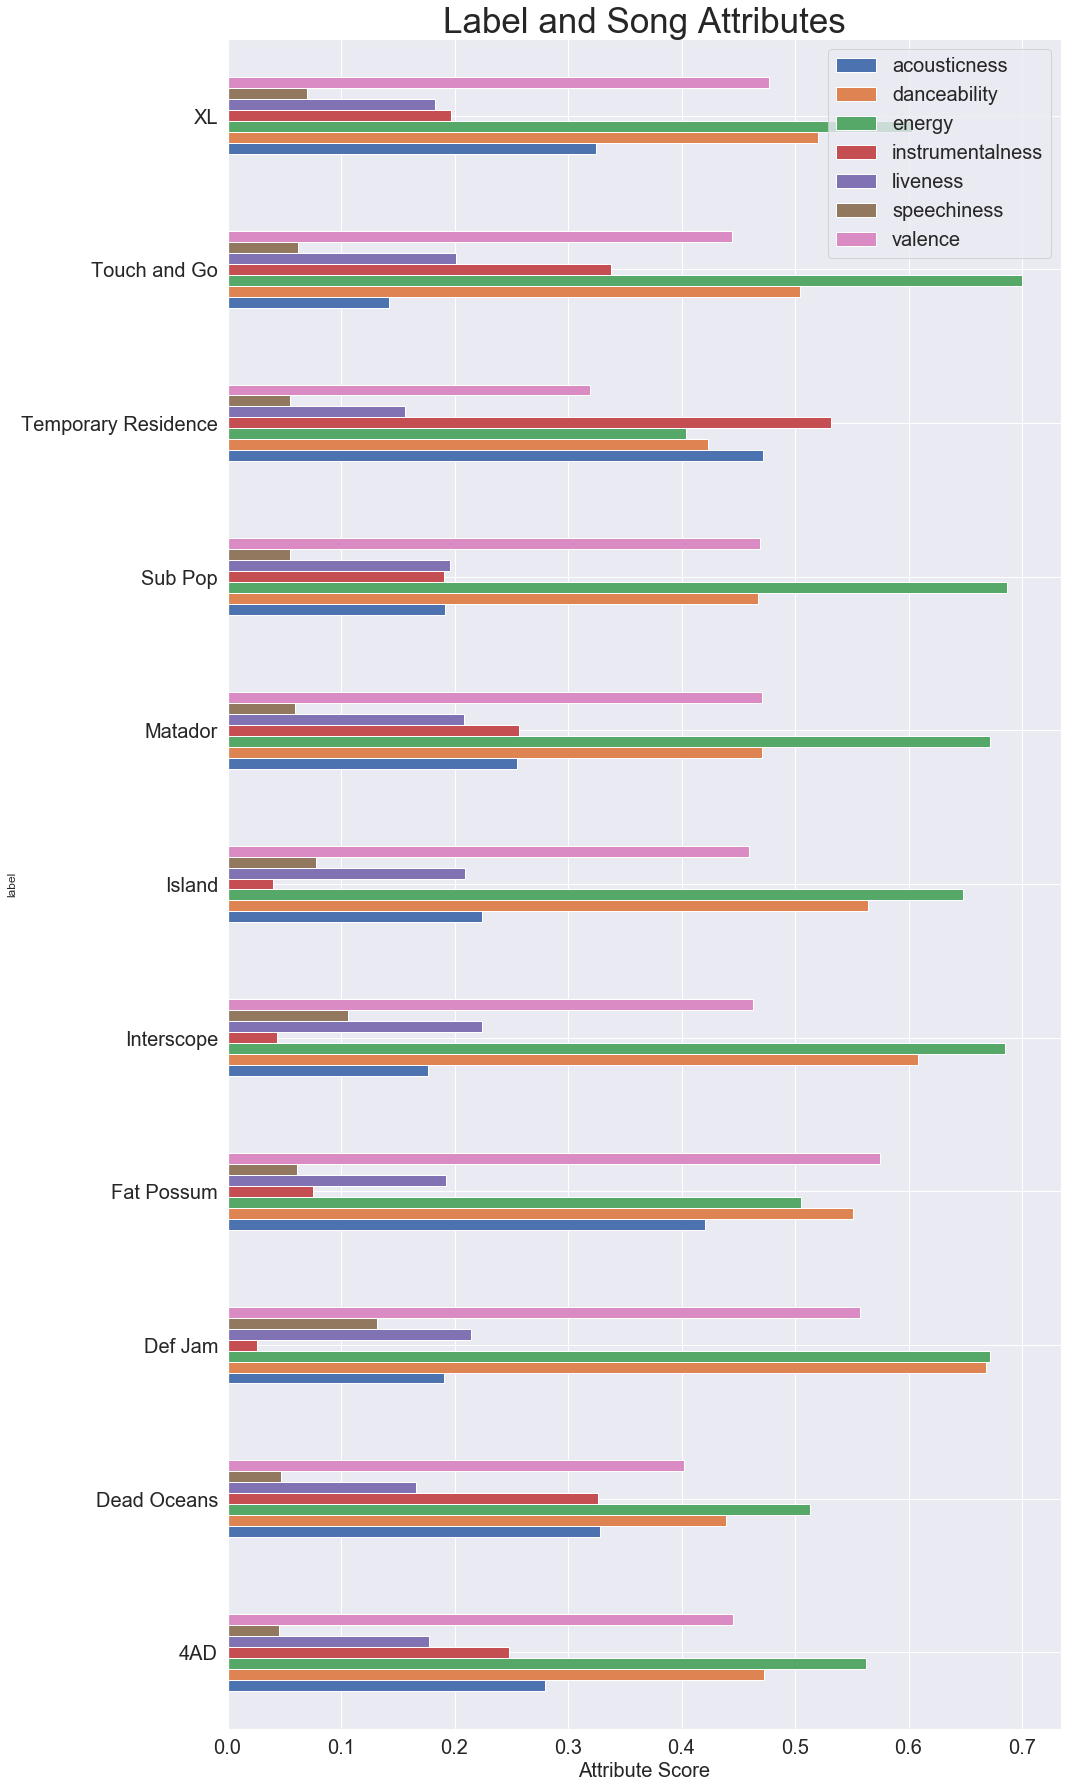

In [192]:
# visualize the above df
fig = label_sum_df.plot(kind='barh', 
                  by='label', 
                  figsize=(15,25),
                 title='Label and Song Attributes',
                fontsize=20)
fig.set_xlabel('Attribute Score', fontdict={'fontsize':20})
fig.title.set_size(35)
fig.legend(fontsize=20, loc='best')
save_fig('label_song_attr_barh');

Saving figure 4AD_song_attr_bar
Saving figure Dead Oceans_song_attr_bar
Saving figure Def Jam_song_attr_bar
Saving figure Fat Possum_song_attr_bar
Saving figure Interscope_song_attr_bar
Saving figure Island_song_attr_bar
Saving figure Matador_song_attr_bar
Saving figure Sub Pop_song_attr_bar
Saving figure Temporary Residence_song_attr_bar
Saving figure Touch and Go_song_attr_bar
Saving figure XL_song_attr_bar


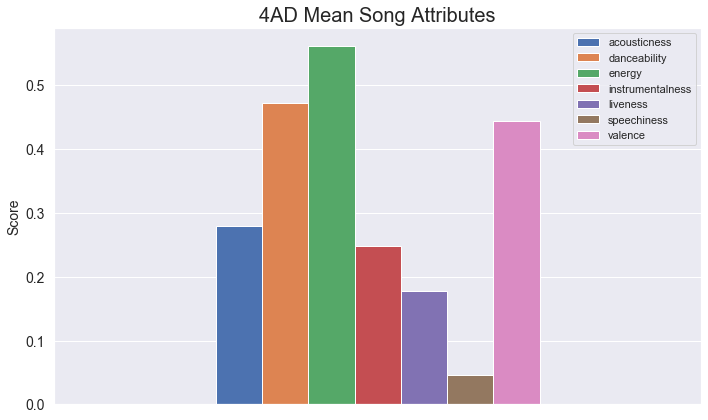

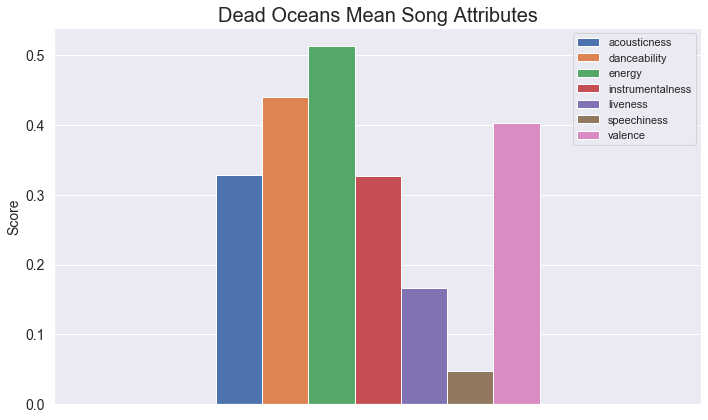

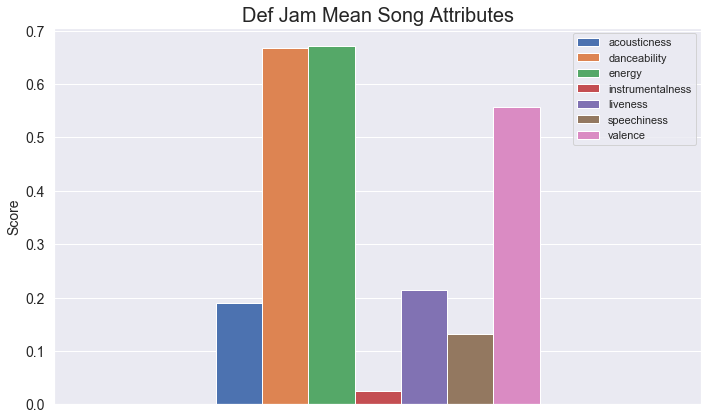

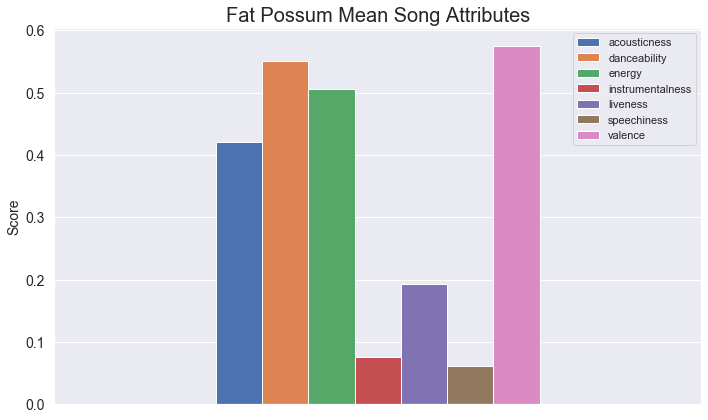

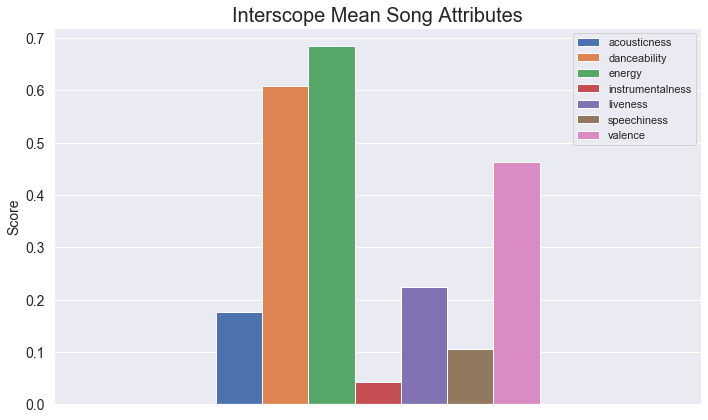

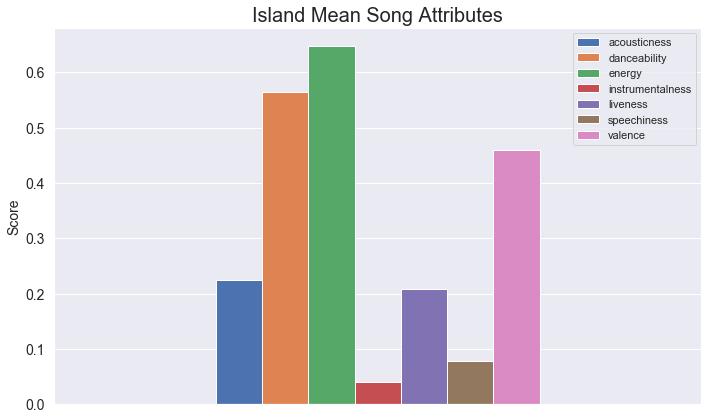

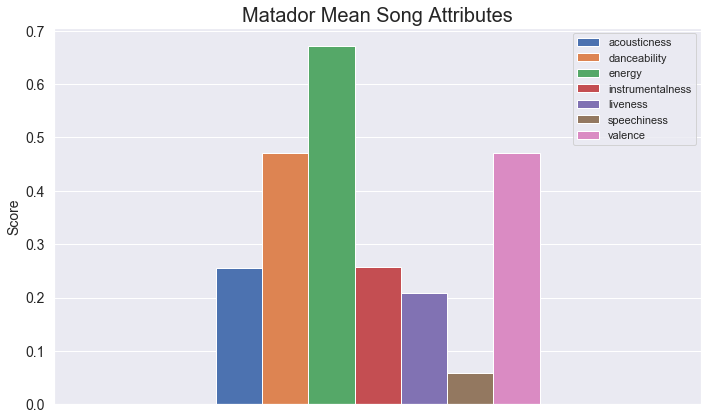

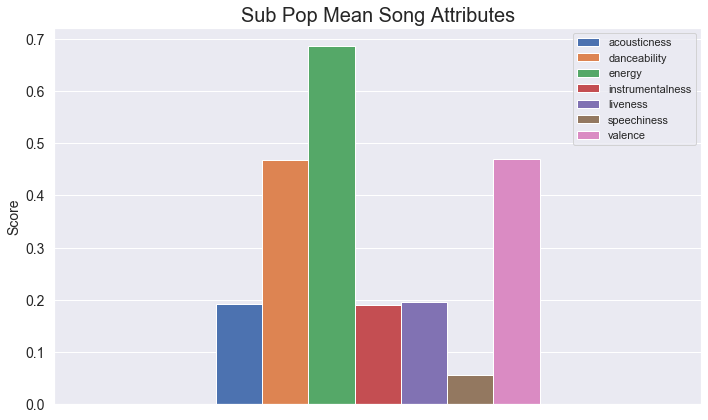

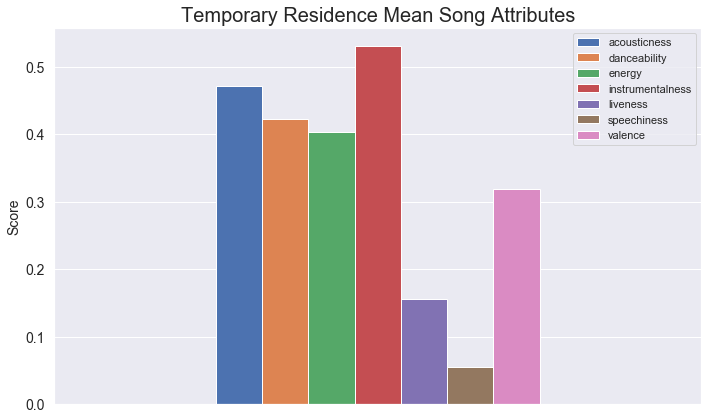

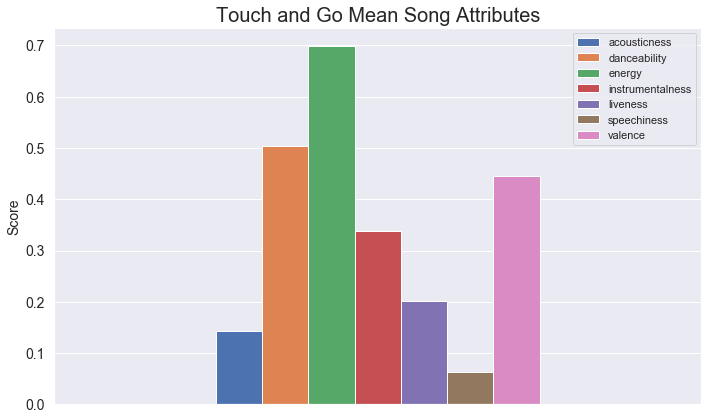

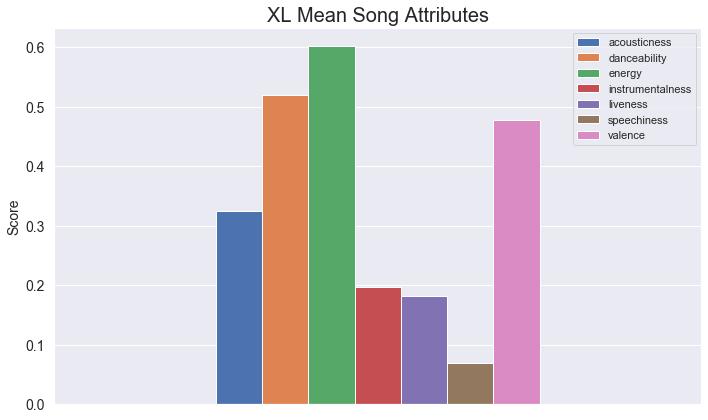

In [193]:
# summary of song charactieristics by label
label_list = label_sum_df.index
for label in label_list:
    label_sum_df.loc[[label]].plot(kind='bar',
                            figsize=(10,6),
                                  fontsize=14,
                                  rot='horizontal')
    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    x_axis.set_visible(False)
    plt.xlabel('')
    plt.ylabel('Score', fontdict={'fontsize':14})
    plt.title(label=label + " Mean Song Attributes", fontdict={'fontsize':20})
    save_fig(label + '_song_attr_bar');

Mean song attributes visualize the average value of each song attribute per record label. This allows us to get a general overall feel for the average song attributes in each record labels song catalog.

In [200]:
## artist count per label
df.groupby('label')['artist'].count()

label
4AD                     473
Dead Oceans              81
Def Jam                1284
Fat Possum              615
Interscope             1900
Island                 1800
Matador                 486
Sub Pop                 964
Temporary Residence      48
Touch and Go             62
XL                      446
Name: artist, dtype: int64

### Include Scaled Features

In [319]:
# group averaged song attributes for all continuous features, by records label
continuous_features = ['scaled_loudness', 'scaled_tempo','scaled_pop', 'scaled_duration', 'scaled_speech',
                    'valence',  'liveness', 'instrumentalness', 'energy', 'danceability', 'acousticness']
grouped_by_label = df.groupby('label')[continuous_features].mean()
grouped_by_label.sample(5)

,scaled_loudness,scaled_tempo,scaled_pop,scaled_duration,scaled_speech,valence,liveness,instrumentalness,energy,danceability,acousticness
label,,,,,,,,,,,
Fat Possum,0.764871,0.496137,0.350016,0.040317,0.250542,0.575210,0.192469,0.075654,0.505139,0.551361,0.420300
XL,0.797955,0.488615,0.482130,0.044633,0.286905,0.477185,0.182411,0.196815,0.602645,0.520409,0.325013
Temporary Residence,0.701923,0.462358,0.440000,0.064061,0.224986,0.319010,0.155975,0.531453,0.403742,0.423383,0.471849
Dead Oceans,0.775936,0.477911,0.485309,0.046522,0.194595,0.402330,0.165757,0.326451,0.513146,0.439210,0.328258
Atlantic,0.840976,0.507457,0.581351,0.040593,0.412979,0.467598,0.187962,0.017286,0.668716,0.626815,0.197012


Saving figure attr_label_plot


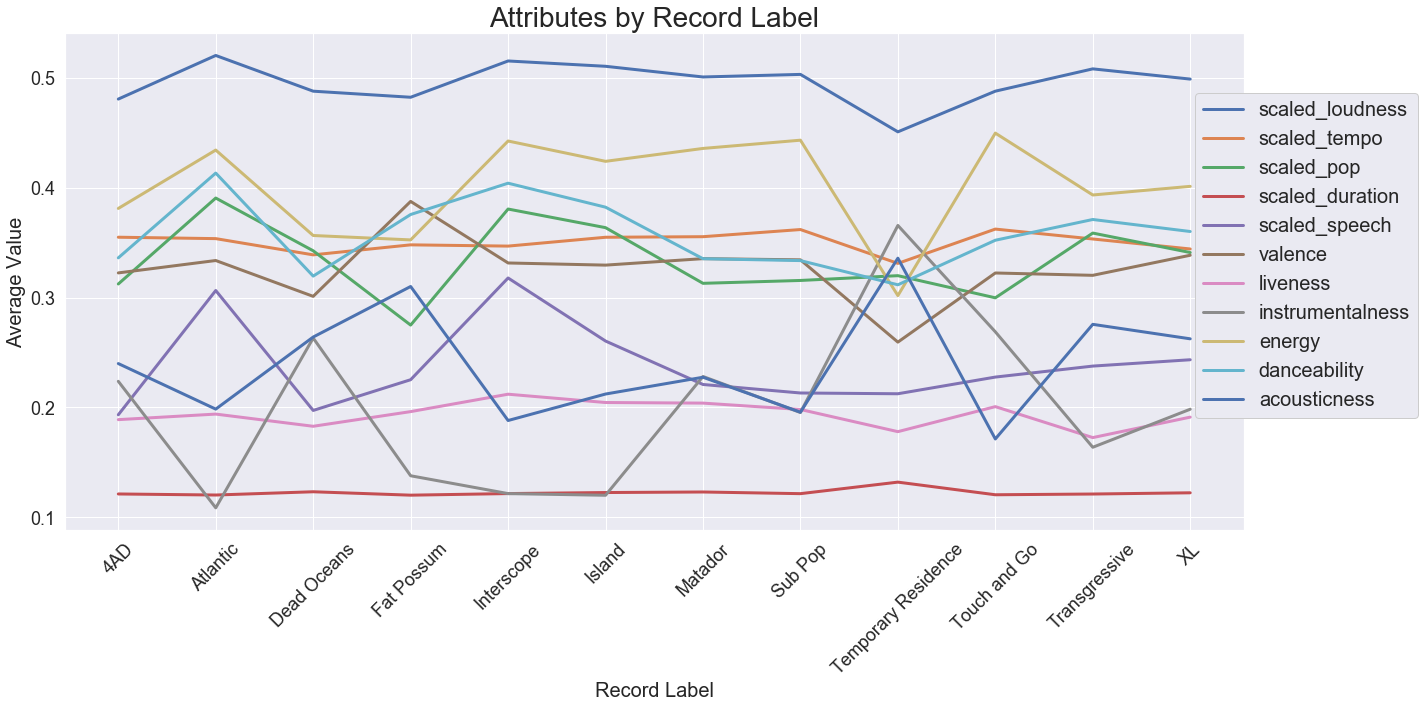

In [320]:
# plot the above dataframe
plt.figure(figsize=(20, 10))
for feat in continuous_features:
    x = grouped_by_label[feat]
    ax= sns.lineplot(x=x.index,y=x,label=feat,linewidth = 3, seed=4)

ax.set_title('Attributes by Record Label', fontsize=28);
ax.set_ylabel('Average Value', fontsize=20);
ax.set_xlabel('Record Label', fontsize=20);
ax.legend(prop=dict(size=20), loc='best', bbox_to_anchor=(.95, .9), framealpha=1.0);
ax.set_xticklabels(fontsize=18, labels=grouped_by_label.index, rotation=45);
ax.set_yticklabels(fontsize=18, labels=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]);
save_fig('attr_label_plot');

This allows us to see the change in attribute by record label. A label like Temporary Residence has a high `instrumentalness` score which explains the corresponding peak. More popular main stream labels such as Island and Interscope, have very low `instrumentalness` scores because they primarily market pop music. This quick visualization allows us to see all the song attributes and labels on one chart, allowing us to make quick comparisions.

### Direct comparison of record labels

Saving figure temp_sub_energy


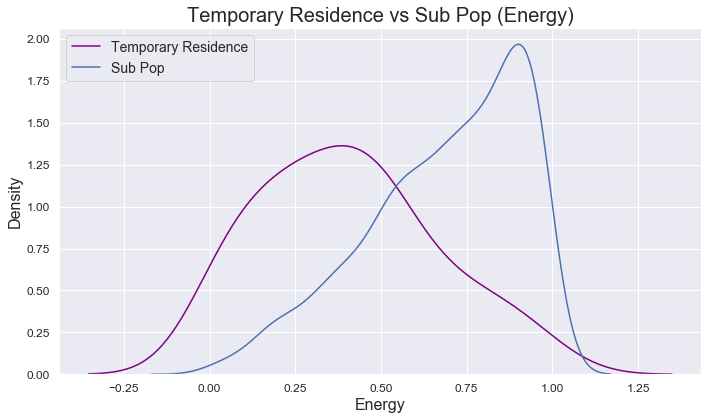

In [251]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['energy'][df['label'] == 'Temporary Residence'], label= 'Temporary Residence', color='purple', hist=False);
ax = sns.distplot(df['energy'][df['label'] == 'Sub Pop'], label= 'Sub Pop', hist=False);
ax.set_title('Temporary Residence vs Sub Pop (Energy)', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('Energy', fontsize=16);
ax.legend(prop=dict(size=14));
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
save_fig('temp_sub_energy');


Saving figure possum_interscope_acousticness


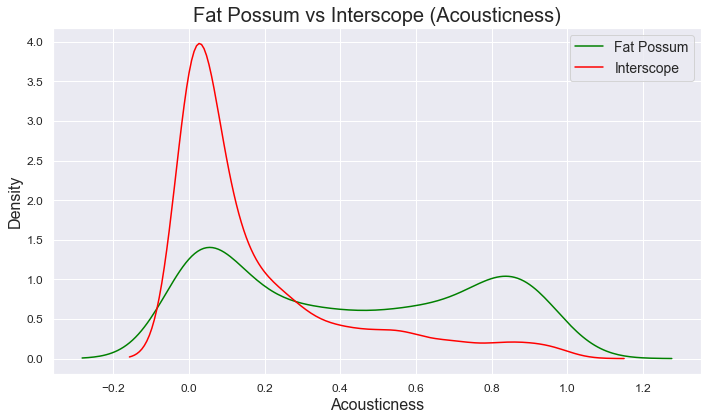

In [250]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['acousticness'][df['label'] == 'Fat Possum'], label= 'Fat Possum', color='green', hist=False);
ax = sns.distplot(df['acousticness'][df['label'] == 'Interscope'], label= 'Interscope', color='red', hist=False);
ax.set_title('Fat Possum vs Interscope (Acousticness)', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('Acousticness', fontsize=16);
ax.legend(prop=dict(size=14));
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
save_fig('possum_interscope_acousticness');


Saving figure defjam_oceans_speechi


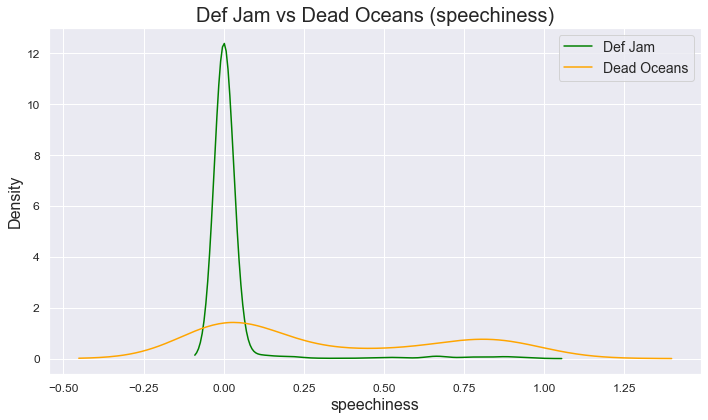

In [249]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['instrumentalness'][df['label'] == 'Def Jam'], label= 'Def Jam', color='green', hist=False);
ax = sns.distplot(df['instrumentalness'][df['label'] == 'Dead Oceans'], label= 'Dead Oceans',color='orange', hist=False);
ax.set_title('Def Jam vs Dead Oceans (speechiness)', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('speechiness', fontsize=16);
ax.legend(prop=dict(size=14));
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
save_fig('defjam_oceans_speechi');


### Heatmap of most variant attributes

Saving figure heatmap_variant_attr


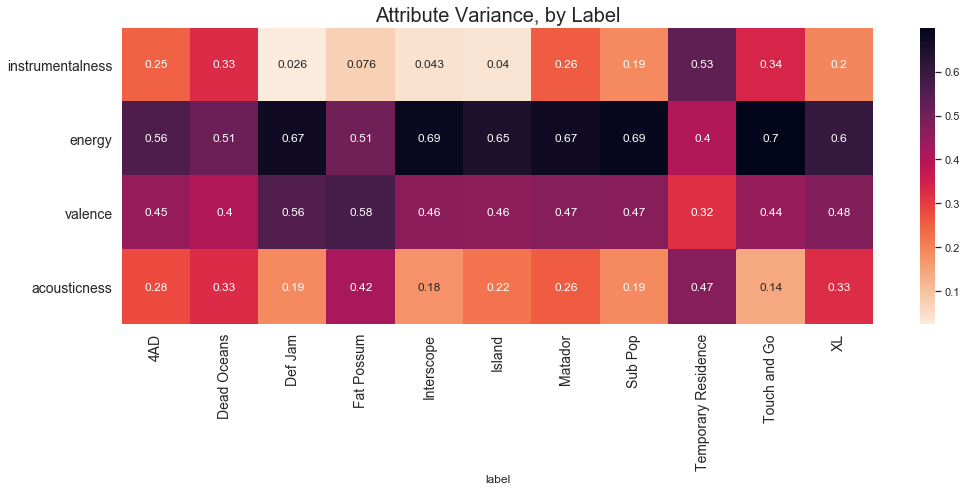

In [246]:
# pivot the table
pivoted = grouped_by_label.pivot_table(columns=grouped_by_label.index)

# make heatmap with most variant features
plt.figure(figsize=(15, 7));
plt.title('Attribute Variance, by Label', fontsize=20);
ax.set_ylim(-20, 20);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
sns.heatmap(pivoted.loc[['instrumentalness', 'energy', 'valence', 'acousticness']],annot=True, cmap='rocket_r');
save_fig('heatmap_variant_attr');

The most variant attributes between labels are listed above. The darker the color the higher the score. For the labels examined in this study. we can see `energy` has consistantly the highest score.

### Save cleaned dataframe to CSV

Export the cleaned dataframes to CSV. This will enable us to import them into our modeling notebook to perform recommendations.

In [321]:
df.to_csv('data/cleaned_data_labels.csv')
df.head()

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade,letter_keys,modes,key_mode,scaled_speech,scaled_duration,scaled_loudness,scaled_tempo,scaled_pop,A Minor,Ab Major,Ab Minor,B Major,B Minor,Bb Major,Bb Minor,C Major,C Minor,D Major,D Minor,Db Major,Db Minor,E Major,E Minor,Eb Major,Eb Minor,F Major,F Minor,F# Major,F# Minor,G Major,G Minor,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2020s,artist,label
0,0.943,0.605,188093,0.018,0,2LhGDIwDaIw6auSyLtlWuY,0.243000,6,0.0938,-22.202,1,Come On And See About Me,17,1960-01-01,0.0792,119.454,0.142,1960,1960s,F#,Major,F# Major,0.324597,0.033896,0.591935,0.489383,0.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
1,0.750,0.659,222093,0.236,0,1UdNQ15Q54vCtmo02TLWfq,0.000022,0,0.0700,-15.960,1,The Journey,13,1961-01-01,0.0424,99.012,0.853,1961,1960s,C,Major,C Major,0.173774,0.040194,0.689688,0.405636,0.13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
2,0.638,0.456,150269,0.296,0,6EdBagK4kqITdw34mBzTof,0.034300,10,0.1080,-12.578,1,A New Leaf,18,1962-01-01,0.0387,174.549,0.427,1962,1960s,Bb,Major,Bb Major,0.158610,0.026890,0.742651,0.715098,0.18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
3,0.589,0.459,164075,0.167,0,030z99G9TFWAE5Wq0Q6tcg,0.001870,5,0.1040,-14.102,1,I Got A Letter (This Morning),18,1962-01-01,0.0401,181.953,0.196,1962,1960s,F,Major,F Major,0.164348,0.029447,0.718785,0.745431,0.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum
4,0.527,0.682,167336,0.424,0,6S75o3nKlPCfpdAFx0Rseo,0.000000,5,0.1290,-13.623,1,Drug Store Woman,18,1962-01-01,0.0464,70.466,0.688,1962,1960s,F,Major,F Major,0.190168,0.030051,0.726286,0.288687,0.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,John Lee Hooker,Fat Possum


In [322]:
main_df.to_csv('data/cleaned_data_main.csv')
main_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade,letter_keys,modes,key_mode,scaled_speech,scaled_duration,scaled_loudness,scaled_tempo,scaled_pop,A Minor,Ab Major,Ab Minor,B Major,B Minor,Bb Major,Bb Minor,C Major,C Minor,D Major,D Minor,Db Major,Db Minor,E Major,E Minor,Eb Major,Eb Minor,F Major,F Minor,F# Major,F# Minor,G Major,G Minor,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2020s
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928-01-01,0.050600,118.469,0.7790,1928,1920s,Bb,Major,Bb Major,0.207381,0.028442,0.745000,0.485348,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.994,Robert Schumann,0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928-01-01,0.046200,83.972,0.0767,1928,1920s,Ab,Major,Ab Major,0.189348,0.051316,0.494026,0.344019,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928-01-01,0.243995,107.177,0.8800,1928,1920s,F,Minor,F Minor,1.000000,0.018374,0.627609,0.439086,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.092600,108.003,0.7200,1928,1920s,Db,Minor,Db Minor,0.379516,0.032538,0.708887,0.442470,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.990,Frédéric Chopin,0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928-01-01,0.042400,62.149,0.0693,1928,1920s,B,Major,B Major,0.173774,0.126450,0.676079,0.254614,0.01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
